# REGRESSOR

In [1]:
import numpy as np
from consistent_plots import hist, hist2d
import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
from pandas import DataFrame
from matplotlib import colors

In [35]:
filename = 'inputs/reco/nn_input_MX700_MY400_reg.npz'
ex = np.load(filename)

for i,file in enumerate(ex.files):
    j = i + 1
    if j%3 > 0:
        print(file, end='\t\t\t')
    else:
        print(file)

m_test			X_train			x_train
X_val			x_val			X_test
x_test			y_train			y_test
y_val			train			val
test			

In [36]:
print("(nevents, nfeatures)")
ex['X_train'].shape # (nevents, nfeatures)

(nevents, nfeatures)


(17636, 9)

In [19]:
feature_names = ['H1.pt', 'H1.eta', 'H1.phi', 'H2.pt', 'H2.eta', 'H2.phi', 'dR']#, 'H1_score', 'H2_score']#, 'H1.mass', 'H2.mass']

feature_dict = {}
for i, name in enumerate(feature_names):
    feature_dict[name] = examples['X_train'][:,i]
feature_dict.keys()

dict_keys(['H1.pt', 'H1.eta', 'H1.phi', 'H2.pt', 'H2.eta', 'H2.phi', 'dR'])

In [20]:
pt_bins = np.linspace(0,400,100)
eta_bins = np.linspace(-4,4,100)
phi_bins = np.linspace(-6.5,6.5,100)
m_bins = np.linspace(0,400,100)
dR_bins = np.linspace(0,7,100)
s_bins = np.linspace(0,1.01,100)

bins_dict = {0:pt_bins, 1:eta_bins, 2:phi_bins, 
             3:pt_bins, 4:eta_bins, 5:phi_bins, 
             6:dR_bins, 7:s_bins,  8:s_bins}
labels_dict = {0:r'$p_T$ [GeV]', 1:r'$\eta$', 2:r'$\phi$ [rad]', 
               3:r'$p_T$ [GeV]', 4:r'$\eta$', 5:r'$\phi$ [rad]', 
               6:r'$\Delta R$', 7:'classifier score',  8:'classifier score'}

/eos/user/s/srosenzw/miniconda3/envs/work/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


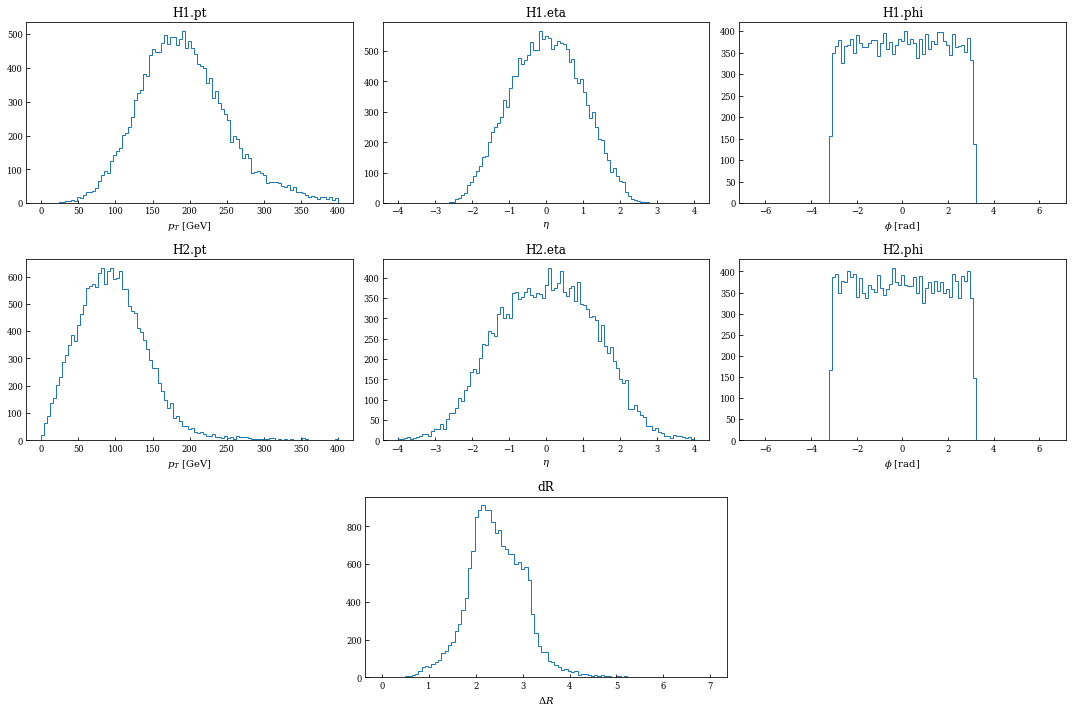

In [22]:
ncols=3
fig = plt.figure(figsize=(15,10))
grid = gs.GridSpec(nrows=3, ncols=ncols)

for i in np.arange(6):
    row, col = i//ncols, i%ncols
    ax = fig.add_subplot(grid[row, col])
    ax.set_title(feature_names[i])
    data = feature_dict[feature_names[i]]
    bins = bins_dict[i]
    hist(ax, data, bins=bins)
    ax.set_xlabel(labels_dict[i])

ax = fig.add_subplot(grid[2, :])
ax.set_title(feature_names[6])
data = feature_dict[feature_names[6]]
bins = bins_dict[6]
hist(ax, data, bins=bins)
ax.set_xlabel(labels_dict[6])
ax.set_box_aspect(0.5)

grid.tight_layout(fig)

In [ ]:
df = DataFrame(data=feature_dict)
df.corr().style.background_gradient()

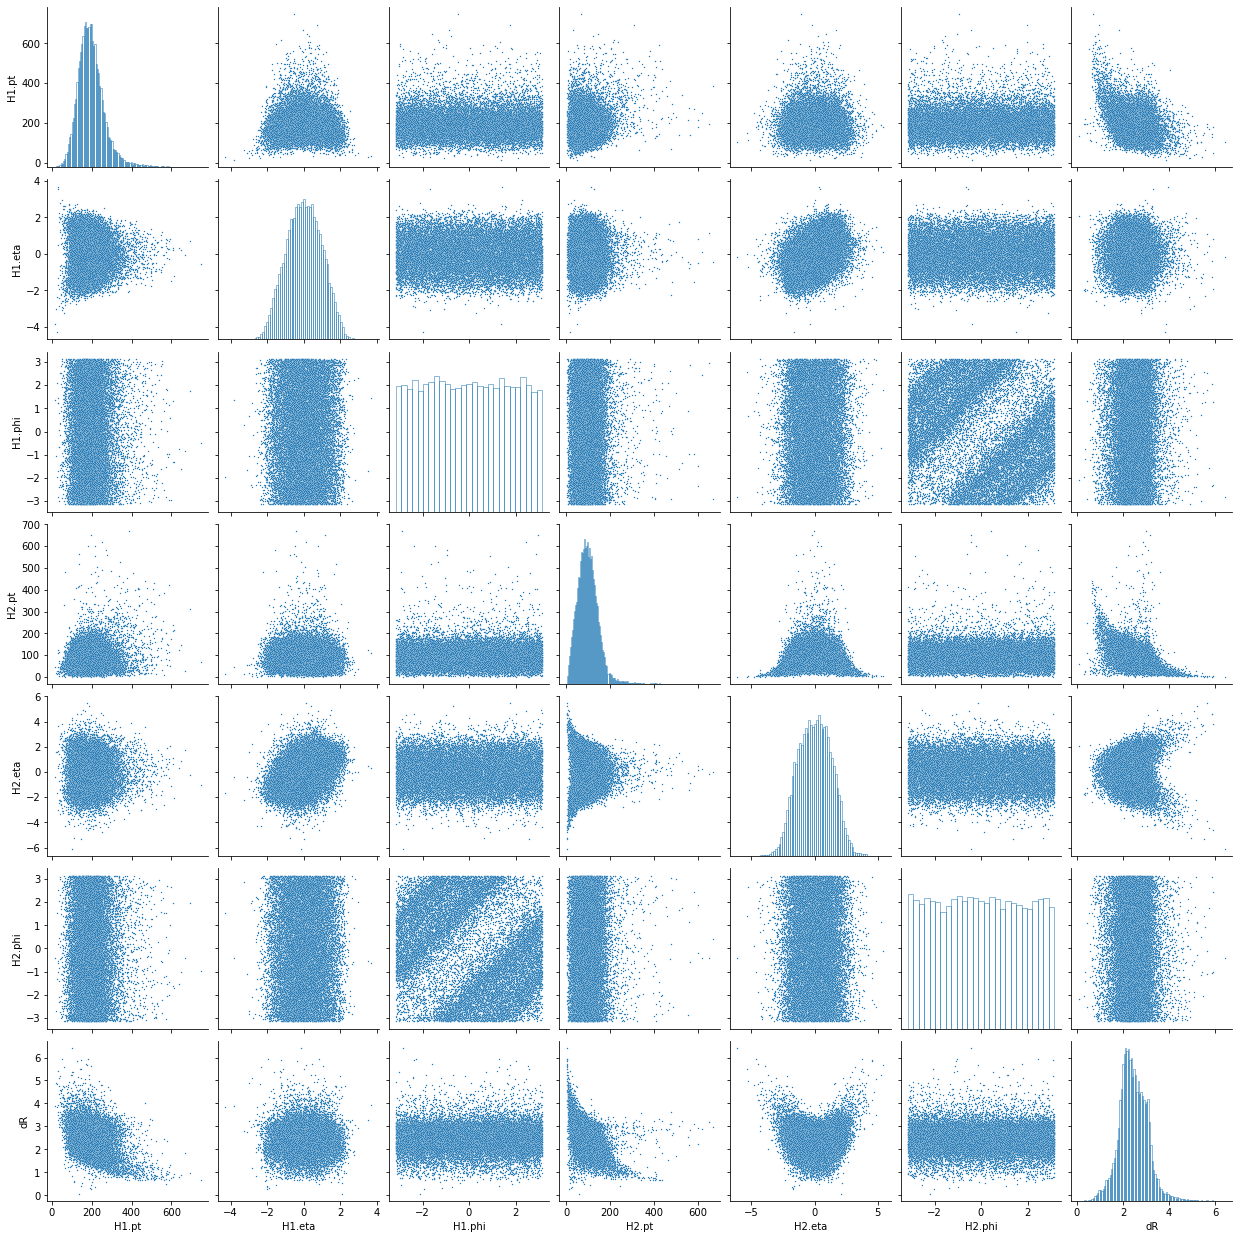

In [9]:
import seaborn as sns
# df['target'] = examples['y_train']
sns.pairplot(df, diag_kws=dict(fill=False), plot_kws={"s": 2})

In [10]:
%run quick_analysis.py

-- [INFO] -- /eos/user/s/srosenzw/miniconda3/envs/work/lib/python3.8/runpy.py -- Parsing command line arguments.
          Score          Target                  Difference
------------------------------------------------------------
      [400.03848]  	400.0	[-0.03848267]
      [400.04028]  	400.0	[-0.0402832]
      [400.03293]  	400.0	[-0.03292847]
      [400.03247]  	400.0	[-0.0324707]
      [400.04083]  	400.0	[-0.04083252]
      [400.03793]  	400.0	[-0.03793335]
      [400.0475]  	400.0	[-0.04748535]
      [400.0396]  	400.0	[-0.03961182]
      [400.02176]  	400.0	[-0.02175903]
      [400.03006]  	400.0	[-0.03005981]
      [400.03928]  	400.0	[-0.03927612]
      [400.02524]  	400.0	[-0.02523804]


In [23]:
infile = 'models/regressor/reco/scores_1.npz'

f = np.load(infile)

In [24]:
f.files

['scores', 'target']

In [25]:
scores = f['scores']
target = f['target']

In [26]:
scores.shape

(55429, 1)

In [ ]:
trueY_scores = scores[:ntest]
trueY_target = target[:ntest]

nonY_scores = scores[ntest:]
nonY_target = target[ntest:]

NameError: name 'trueY_target' is not defined

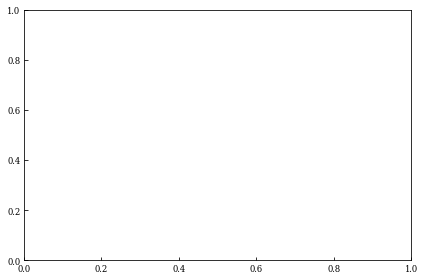

In [28]:
m_bins = np.linspace(0,700, 100)
fig, ax = plt.subplots()
hist(ax, trueY_target, bins=m_bins, label='Y')
hist(ax, nonY_target, bins=m_bins, label='non Y')
ax.set_xlabel(r'$m_Y$ [GeV]')
# fig.savefig("Evaluations/regressor/scores_target.pdf")

In [ ]:
diff = (scores.ravel() - target) / target * 100

bins = np.linspace(-25,25,100)
fig, ax = plt.subplots()
_ = hist(ax, diff, bins=bins)
ax.set_title('Difference between scores and targets')
ax.set_yscale('log')
ax.set_xlabel(r'% Error')
# fig.savefig("Evaluations/regressor/percentage.pdf")

In [ ]:
diff = (scores.ravel() - target)

bins = np.linspace(-100,100,100)
fig, ax = plt.subplots()
_ = hist(ax, diff, bins=bins)
ax.set_yscale('log')
ax.set_title('Difference between scores and targets')
ax.set_xlabel(r'$\Delta m$ [GeV]')
fig.savefig("Evaluations/regressor/difference.pdf")

In [15]:
trueY_scores.flatten().shape

(5039,)

In [16]:
trueY_target.shape

(5039,)

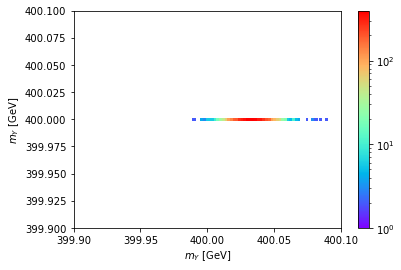

In [19]:
m_bins = np.linspace(399.9, 400.1, 100)
fig, ax = plt.subplots()
n, xedges, yedges, im = hist2d(ax, trueY_scores.flatten(), trueY_target, xbins=m_bins, ybins=m_bins, norm=colors.Normalize())
ax.set_xlabel(r'$m_Y$ [GeV]')
ax.set_ylabel(r'$m_Y$ [GeV]')
fig.colorbar(im, ax=ax)
# fig.savefig("Evaluations/regressor/scores_target.pdf")

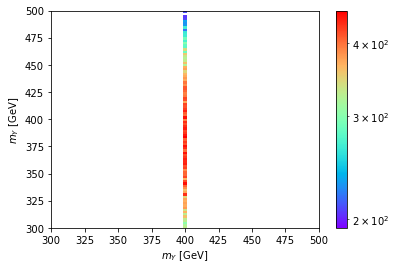

In [24]:
m_bins = np.linspace(300, 500, 100)
fig, ax = plt.subplots()
n, xedges, yedges, im = hist2d(ax, nonY_scores.flatten(), nonY_target.flatten(), xbins=m_bins, ybins=m_bins, norm=colors.Normalize())
ax.set_xlabel(r'$m_Y$ [GeV]')
ax.set_ylabel(r'$m_Y$ [GeV]')
fig.colorbar(im, ax=ax)
# fig.savefig("Evaluations/regressor/scores_target.pdf")